In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import lineagevi
from lineagevi import LineageVI
import numpy as np
import torch

In [2]:
adata = sc.read_h5ad('/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.09.12_13.51.28/adata_with_velocity.h5ad')

In [3]:
linvi = LineageVI(
        adata,
        n_hidden=128,
        mask_key="I",
        unspliced_key="Mu",
        spliced_key="Ms",
    )

#model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.08.17_12.43.17/vae_velocity_model.pt'
model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.09.12_13.51.28/vae_velocity_model.pt'
linvi.model.load_state_dict(torch.load(model_path, map_location='cpu'))
linvi.model.eval()

LineageVIModel(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=1805, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
    )
    (mean_layer): Linear(in_features=128, out_features=647, bias=True)
    (logvar_layer): Linear(in_features=128, out_features=647, bias=True)
  )
  (gene_decoder): MaskedLinearDecoder(
    (linear): Linear(in_features=647, out_features=1805, bias=True)
  )
  (velocity_decoder): VelocityDecoder(
    (shared_decoder): Sequential(
      (0): Linear(in_features=647, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
    )
    (gp_velocity_decoder): Linear(in_features=128, out_features=647, bias=True)
    (gene_velocity_decoder): Sequential(
      (0): Linear(in_features=128, out_features=5415, bias=True)
      (1): Softplus(beta=1.0, threshold=20.0)
    )
  )
)

In [4]:
adata.layers['velocity'] *=-1
adata.obsm['velocity_gp'] *=-1

In [5]:
adata_gp = linvi.model.build_gp_adata(adata)

In [6]:
lineagevi.plots.top_gps_table(adata_gp, celltype_key="clusters", categories="Beta", layer="velocity_gp", n=10)

,gp,mean_activation,Beta mean
1,LUPUS_VS_HEALTHY_DONOR_BCELL_D,6.550809,6.550809
2,FETAL_PANCREAS_ISLET_ENDOCRINE,-6.392121,-6.392121
3,MATURITY_ONSET_DIABETES_OF_THE,-6.346779,-6.346779
4,UNTREATED_VS_IL2_TREATED_CD8_T,6.158323,6.158323
5,REGULATION_OF_BETA_CELL_DEVELO,6.156180,6.156180
6,FETAL_INTESTINE_CHROMAFFIN_CEL,-5.988381,-5.988381
7,MAIN_FETAL_ISLET_ENDOCRINE_CEL,-5.907176,-5.907176
8,FETAL_STOMACH_NEUROENDOCRINE_C,5.547380,5.547380
9,RB1_TARGETS_UP,5.512771,5.512771
10,BRAIN_HCP_WITH_H3K27ME3,4.954175,4.954175


In [7]:
lineagevi.plots.top_gps_table(adata, celltype_key="clusters", categories=["Ductal", 'Beta'], layer="velocity", n=30)

,gp,mean_activation,Ductal mean,Beta mean
1,Pyy,-87.126877,-0.249932,-221.778702
2,Iapp,-71.013985,-0.180349,-180.800125
3,Rbp4,-10.105618,-0.109020,-25.599485
4,Ttr,-8.923369,-4.844332,-15.245521
5,Nnat,-7.838881,-0.014922,-19.965361
6,Spp1,-7.671994,-12.630396,0.013104
7,Malat1,-3.984432,-5.515057,-1.612090
8,Sst,-3.825746,-0.023723,-9.718558
9,Gcg,-3.760487,-0.105322,-9.425681
10,Gnas,-3.425225,-0.549509,-7.882334


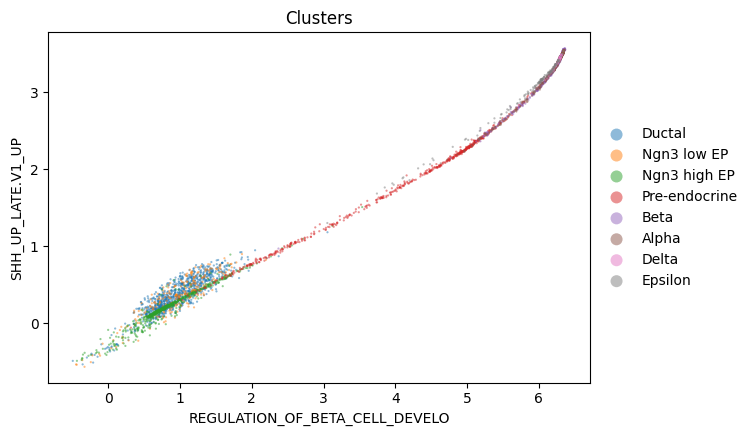

In [8]:
sc.pl.scatter(adata_gp, x='REGULATION_OF_BETA_CELL_DEVELO',y='SHH_UP_LATE.V1_UP', color='clusters', layers='velocity_gp', size=10, alpha=0.5, title='Clusters')

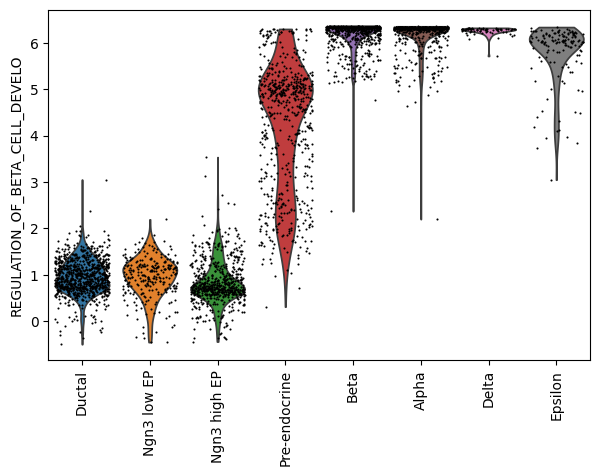

In [9]:
sc.pl.violin(adata_gp, keys="REGULATION_OF_BETA_CELL_DEVELO", layer='velocity_gp', groupby="clusters", rotation=90, stripplot=True, jitter=0.4, size=1.5)

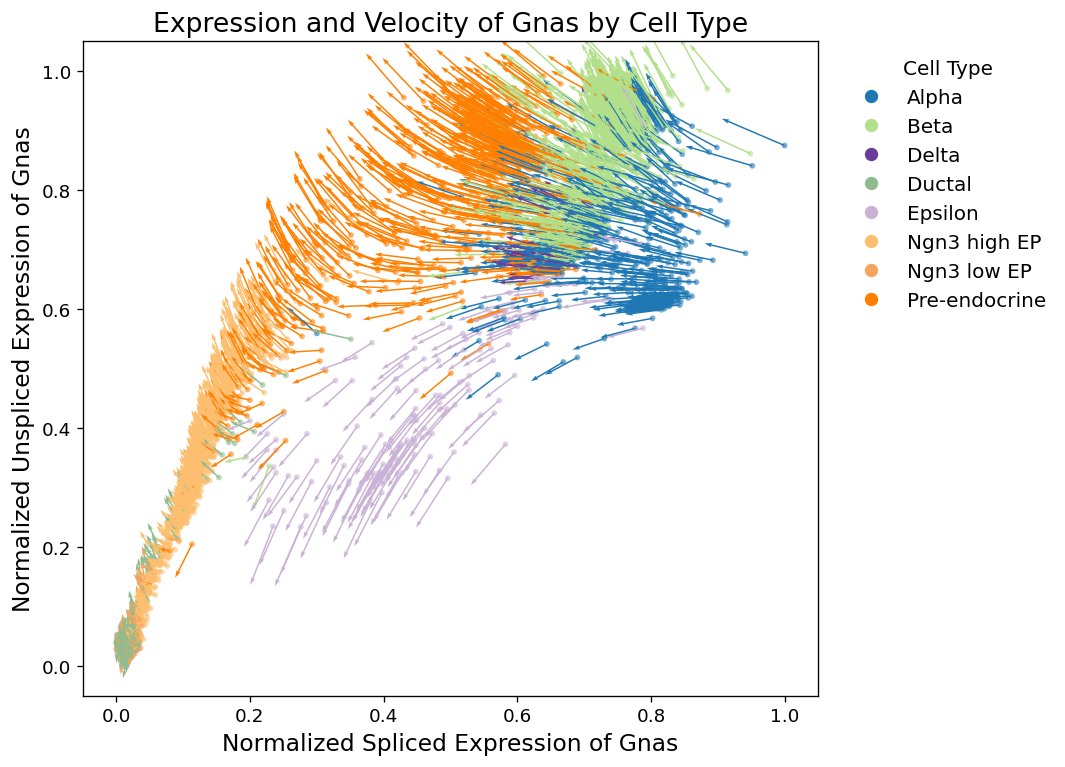

(<Figure size 1080x780 with 1 Axes>,
 <Axes: title={'center': 'Expression and Velocity of Gnas by Cell Type'}, xlabel='Normalized Spliced Expression of Gnas', ylabel='Normalized Unspliced Expression of Gnas'>)

In [11]:
lineagevi.plots.plot_phase_plane(adata, 'Gnas', u_scale=.1, s_scale=.1, alpha=1, head_width=0.02, head_length=0.03, length_includes_head=False)

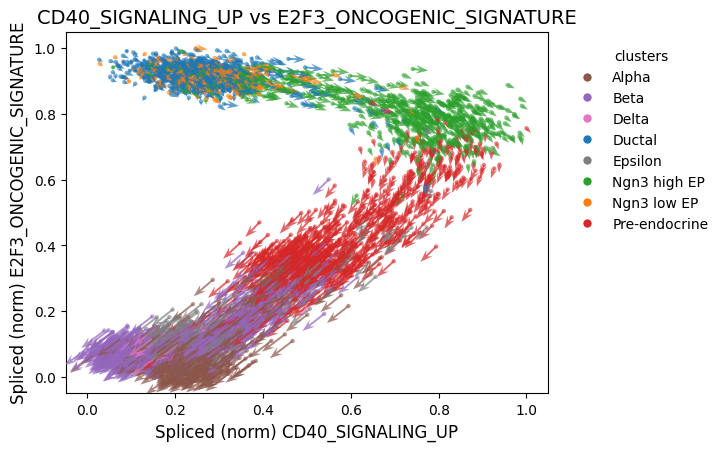

(<Figure size 1040x440 with 2 Axes>,
 array([[<Axes: title={'center': 'CD40_SIGNALING_UP vs E2F3_ONCOGENIC_SIGNATURE'}, xlabel='Spliced (norm) CD40_SIGNALING_UP', ylabel='Spliced (norm) E2F3_ONCOGENIC_SIGNATURE'>,
         <Axes: >]], dtype=object))

In [12]:
lineagevi.plots.plot_gp_phase_planes(adata_gp, program_pairs=[("CD40_SIGNALING_UP", "E2F3_ONCOGENIC_SIGNATURE")])

In [13]:
linvi.model.latent_enrich(adata, groups='clusters', comparison='rest', n_sample=5000, key_added='bf_scores')

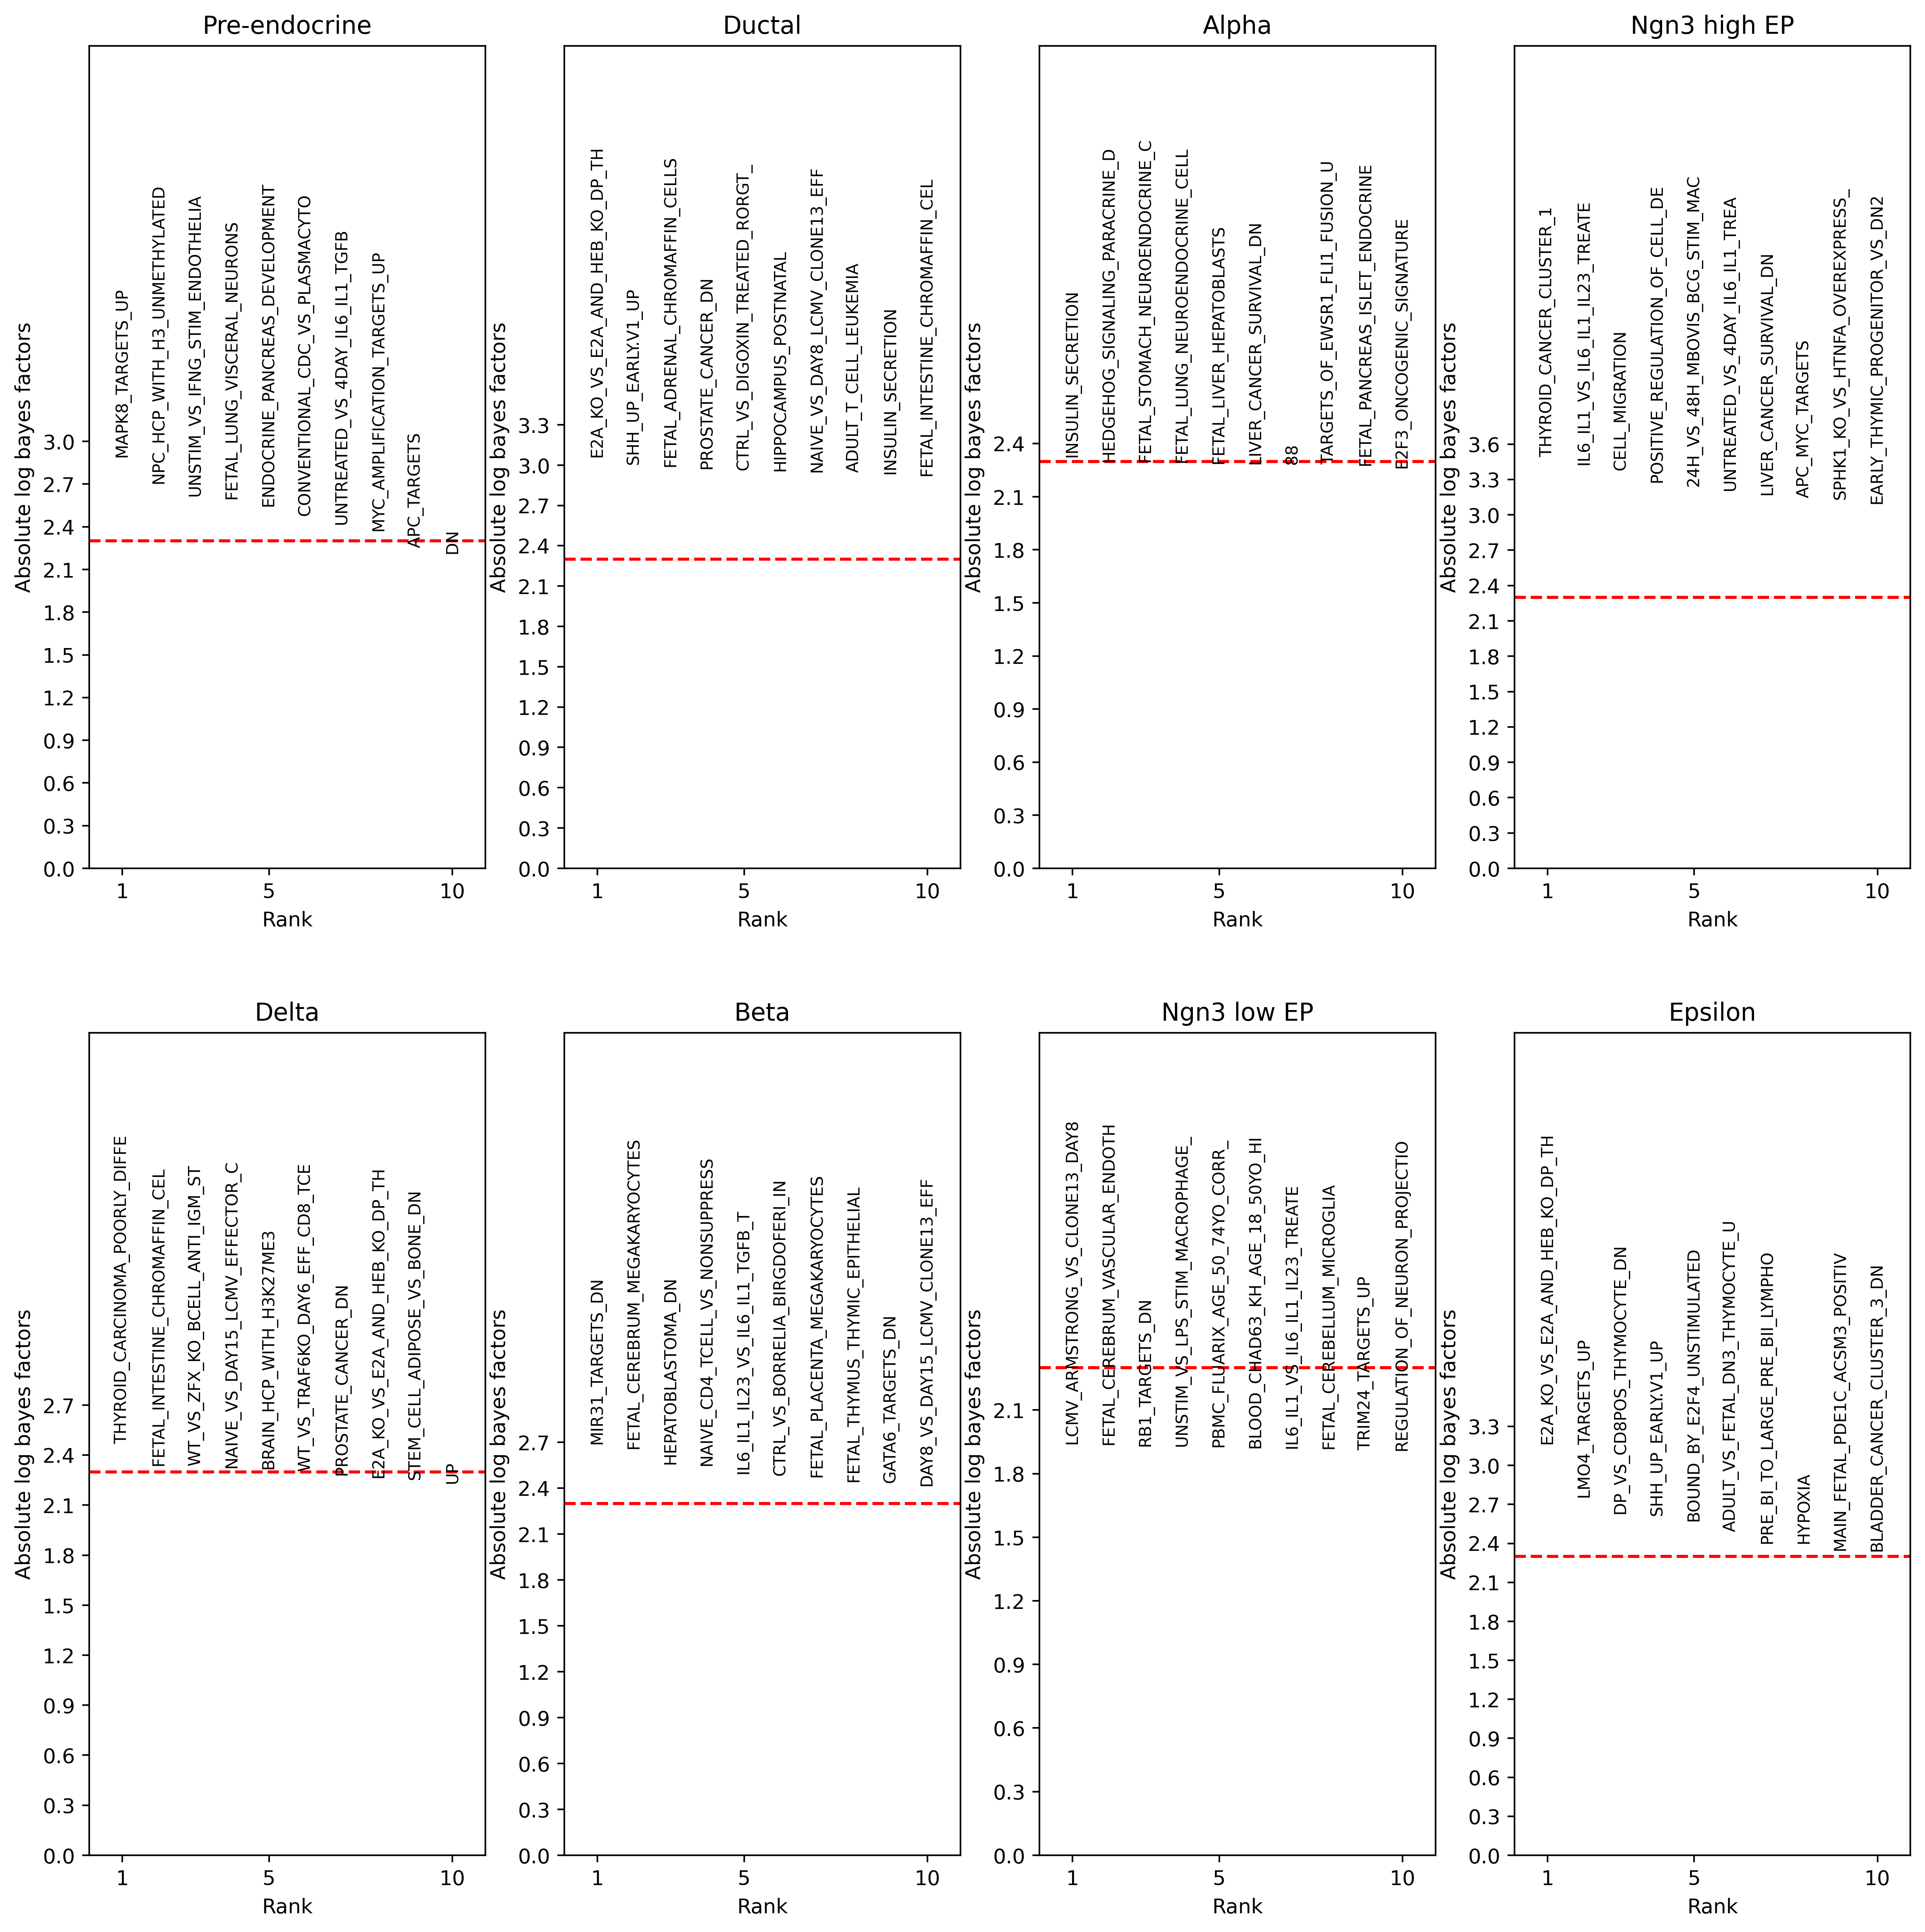

In [14]:
lineagevi.plots.plot_abs_bfs(adata, scores_key='bf_scores', n_cols=4, n_points=10, lim_val=2.3, fontsize=8, scale_y=2, yt_step=0.3,
                    title=None, figsize=None, dpi=400)